# Classical Inference Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


In [2]:
# Load the numerical data
numerical_df = pd.read_csv('../data/clean_reclean/numerical_cleaned.csv')  # adjust path if needed

# Drop any rows with missing values (you can also impute instead)
numerical_df = numerical_df.dropna()


In [3]:
# Basic descriptive statistics
desc_stats = numerical_df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print("Descriptive Statistics:\n", desc_stats)
# Descriptive statistics for SalePrice only
# saleprice_stats = numerical_df['SalePrice'].describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
# print("\nDescriptive Statistics for SalePrice:\n", saleprice_stats)


Descriptive Statistics:
                         mean           std      min       25%       50%  \
Id                726.842105    420.769012      1.0     364.0     725.0   
LotFrontage        70.665477     24.266812     21.0      60.0      70.0   
LotArea         10122.956289   8129.302641   1300.0    7590.0    9416.0   
YearBuilt        1972.264942     30.967730   1880.0    1953.0    1974.0   
YearRemodAdd     1985.683318     21.025974   1950.0    1966.0    1995.0   
MasVnrArea        108.487957    189.500966      0.0       0.0       0.0   
BsmtFinSF1        438.399643    468.385038      0.0       0.0     374.0   
BsmtFinSF2         44.589652    157.828725      0.0       0.0       0.0   
BsmtUnfSF         594.125781    450.259657      0.0     250.0     506.0   
TotalBsmtSF      1077.115076    445.656500      0.0     803.0    1008.0   
1stFlrSF         1173.584300    386.174253    438.0     894.0    1097.0   
2ndFlrSF          353.258698    438.561788      0.0       0.0       0.0   


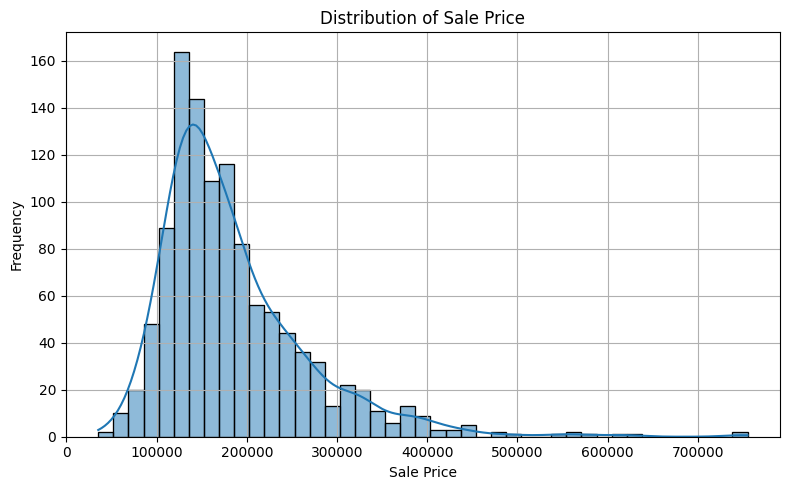

In [4]:
# Histogram of SalePrice
plt.figure(figsize=(8, 5))
sns.histplot(numerical_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


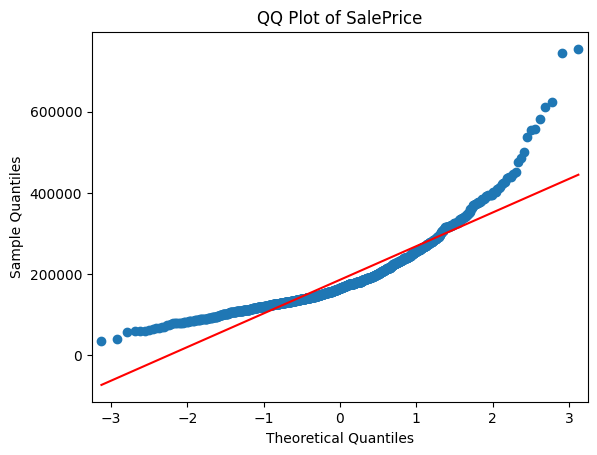

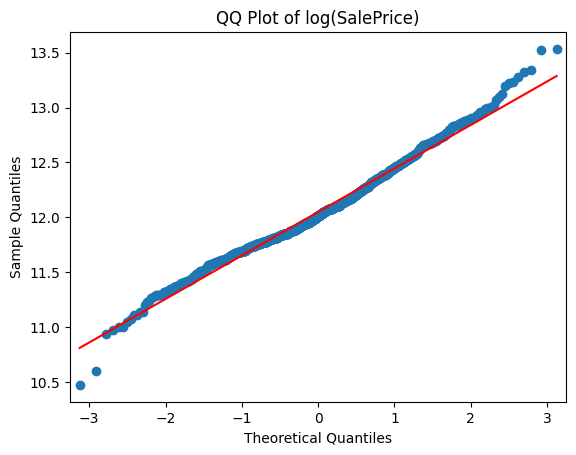

In [5]:
sm.qqplot(numerical_df['SalePrice'], line='s')
plt.title("QQ Plot of SalePrice")
plt.show()
numerical_df['LogSalePrice'] = np.log(numerical_df['SalePrice'])
# QQ-Plot to assess normality
sm.qqplot(numerical_df['LogSalePrice'], line='s')
plt.title("QQ Plot of log(SalePrice)")
plt.show()


### What We See in the QQ Plot

- The points **deviate upward** at the high end (right tail) — this indicates **positive skewness** (a long tail of high sale prices).
- There is also some **deviation at the low end** — possibly due to outliers or mild left-skew artifacts.
- The middle portion is **roughly linear**, which is a good sign, but the **tails deviate significantly**, suggesting that the distribution is **not normal**.

### Why Use a Log Transformation?

Applying a logarithmic transformation to variables like `SalePrice` is useful when the data is **positively skewed** (long tail of high values). It helps:

- **Reduce skewness** and make the distribution more symmetric.
- **Stabilize variance**, especially when large values dominate the range.
- Improve the performance and assumptions of models that expect normally distributed inputs or residuals (e.g., Linear Regression, ARIMA).

In practice, using `log(SalePrice)` often leads to better-fitting and more interpretable models.



In [6]:
# 95% Confidence Interval for SalePrice mean
sample_mean = numerical_df['SalePrice'].mean()
sample_std = numerical_df['SalePrice'].std()
n = len(numerical_df['SalePrice'])
conf_int = stats.t.interval(0.95, df=n-1, loc=sample_mean, scale=sample_std/np.sqrt(n))

print(f"\n95% Confidence Interval for SalePrice Mean: {conf_int[0]:,.2f} to {conf_int[1]:,.2f}")



95% Confidence Interval for SalePrice Mean: 180,642.21 to 190,370.10


### What can we deduce from that ?
The confidence interval is quite small if we take into account that we are speaking of a mean `SalePrice`of 185'000, it represents a bit more than 5%.


In [7]:
# J'arrive pas à dire si cette cell est vraiment utile ou pas, on a déjà un calcul de la moyenne 

# Hypothesis Test: Is the average SalePrice > $180,000?
# H0: mu = 180000, H1: mu > 180000
t_stat, p_value = stats.ttest_1samp(numerical_df['SalePrice'], popmean=180000)

print(f"\nT-statistic: {t_stat:.3f}")
print(f"One-tailed p-value (mean > 180000): {p_value / 2:.4f}")

if t_stat > 0 and (p_value / 2) < 0.05:
    print("Result: Reject H0 — The average SalePrice is significantly greater than $180,000.")
else:
    print("Result: Fail to reject H0 — No significant evidence that SalePrice > $180,000.")



T-statistic: 2.221
One-tailed p-value (mean > 180000): 0.0133
Result: Reject H0 — The average SalePrice is significantly greater than $180,000.


In [8]:
# Tu l'as mis que c'était optionel mais vraiment je pense qu'on s'en bat littéralement les couilles des confidence intervals des autres features

# Optional: Compute confidence intervals for other features
def feature_confidence_intervals(df, confidence=0.95):
    results = {}
    for col in df.columns:
        data = df[col]
        mean = data.mean()
        std = data.std()
        n = len(data)
        ci = stats.t.interval(confidence, df=n-1, loc=mean, scale=std/np.sqrt(n))
        results[col] = (round(ci[0], 2), round(ci[1], 2))
    return pd.DataFrame(results, index=[f'{int(confidence*100)}% CI Lower', f'{int(confidence*100)}% CI Upper']).T

ci_table = feature_confidence_intervals(numerical_df)
print("\nConfidence Intervals for Numerical Features:")
print(ci_table)



Confidence Intervals for Numerical Features:
               95% CI Lower  95% CI Upper
Id                   702.18        751.50
LotFrontage           69.24         72.09
LotArea             9646.56      10599.35
YearBuilt           1970.45       1974.08
YearRemodAdd        1984.45       1986.92
MasVnrArea            97.38        119.59
BsmtFinSF1           410.95        465.85
BsmtFinSF2            35.34         53.84
BsmtUnfSF            567.74        620.51
TotalBsmtSF         1051.00       1103.23
1stFlrSF            1150.95       1196.22
2ndFlrSF             327.56        378.96
LowQualFinSF           2.13          7.01
GrLivArea           1500.72       1562.10
BsmtFullBath           0.38          0.44
BsmtHalfBath           0.04          0.07
FullBath               1.55          1.61
HalfBath               0.35          0.41
BedroomAbvGr           2.82          2.91
KitchenAbvGr           1.03          1.05
Fireplaces             0.57          0.64
GarageCars             1.84   